In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [5]:
df = pd.read_csv("winequality-red.csv")

In [6]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [34]:
cols = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df = pd.DataFrame(np.arange(19200).reshape(1600,12), columns = cols)

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,2,3,4,5,6,7,8,9,10,11
1,12,13,14,15,16,17,18,19,20,21,22,23
2,24,25,26,27,28,29,30,31,32,33,34,35
3,36,37,38,39,40,41,42,43,44,45,46,47
4,48,49,50,51,52,53,54,55,56,57,58,59


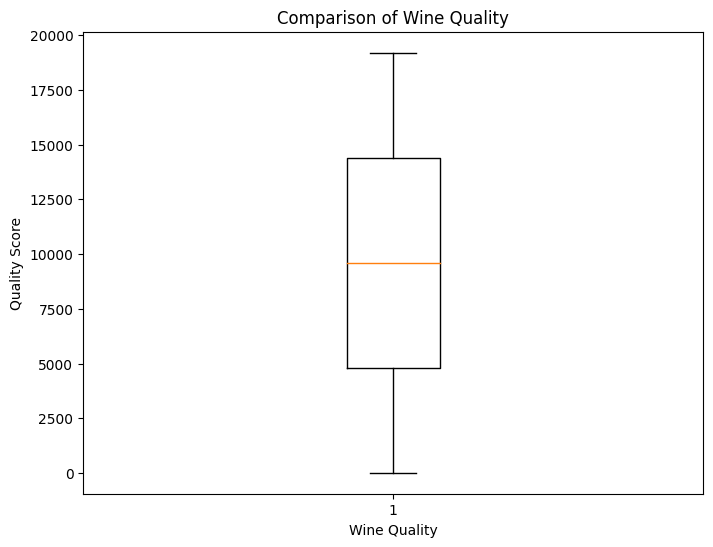

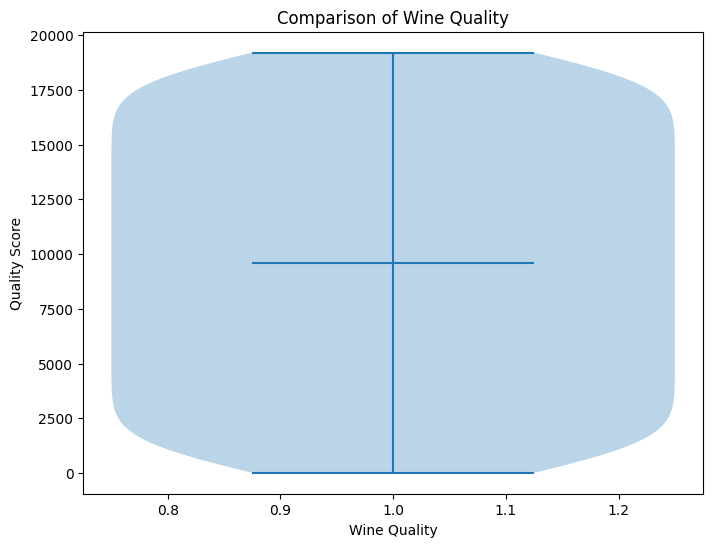

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['quality'])
plt.xlabel('Wine Quality')
plt.ylabel('Quality Score')
plt.title('Comparison of Wine Quality')
plt.show()

plt.figure(figsize=(8, 6))
plt.violinplot(df['quality'], showmedians=True)
plt.xlabel('Wine Quality')
plt.ylabel('Quality Score')
plt.title('Comparison of Wine Quality')
plt.show()

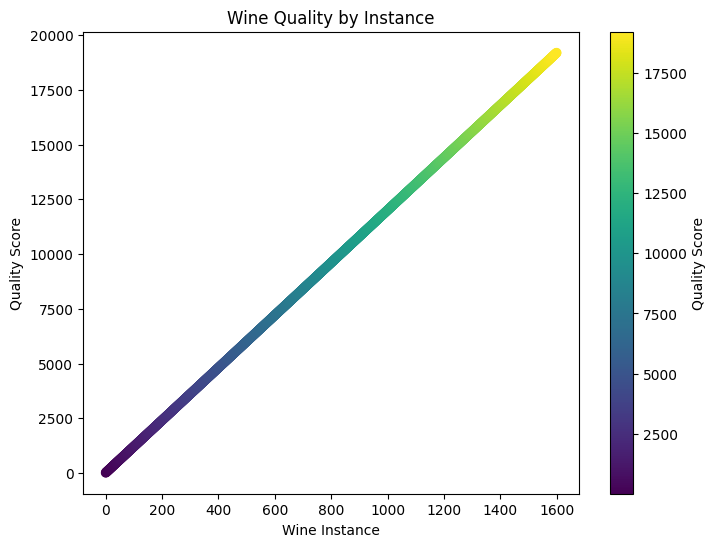

In [53]:
wine_instances = np.arange(len(df))
colors = df['quality']


plt.figure(figsize=(8, 6))
plt.scatter(wine_instances, df['quality'], c=colors, cmap='viridis')
plt.colorbar(label='Quality Score')
plt.xlabel('Wine Instance')
plt.ylabel('Quality Score')
plt.title('Wine Quality by Instance')
plt.show()

In [37]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [39]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,1,2,3,4,5,6,7,8,9,10
1,12,13,14,15,16,17,18,19,20,21,22
2,24,25,26,27,28,29,30,31,32,33,34
3,36,37,38,39,40,41,42,43,44,45,46
4,48,49,50,51,52,53,54,55,56,57,58


In [40]:
y.head()

0    11
1    23
2    35
3    47
4    59
Name: quality, dtype: int64

In [55]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
lr_model = LinearRegression()

In [74]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = lr_model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
mbe = mean_absolute_error(y_test,y_pred)
R2_Score = r2_score(y_test,y_pred)

In [90]:
print("LinearRegression")
print("mse = ", mse)
print("mbe = ", mbe)
print("R2 score = ", R2_Score)

LinearRegression
mse =  2.9778502051908997e-24
mbe =  1.5631940186722204e-12
R2 score =  1.0


In [78]:
svr_model = SVR()

In [80]:
svr_model.fit(X_train,y_train)

SVR()

In [81]:
y1_pred = svr_model.predict(X_test)

In [83]:
mse1 = mean_squared_error(y_test, y1_pred)
mbe1 = mean_absolute_error(y_test,y1_pred)
R2_Score1 = r2_score(y_test,y1_pred)

In [91]:
print("SVR")
print("mse = ", mse1)
print("mbe = ", mbe1)
print("R2 score = ", R2_Score1)

SVR
mse =  26748053.097676605
mbe =  4479.901289504496
R2 score =  0.1104784059573034


In [87]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_test,y_test)

DecisionTreeRegressor()

In [88]:
y2_pred = dt_model.predict(X_test)

In [92]:
mse2 = mean_squared_error(y_test, y2_pred)
mbe2 = mean_absolute_error(y_test,y2_pred)
R2_Score2 = r2_score(y_test,y2_pred)

print("DecisionTreeRegressor")
print("mse = ", mse2)
print("mbe = ", mbe2)
print("R2 score = ", R2_Score2)

DecisionTreeRegressor
mse =  0.0
mbe =  0.0
R2 score =  1.0
